## CONSIGNA
Utilizando los datos de vinos obtenidos del siguiente dataset:
from sklearn.datasets import load_wine
1) Construya 2 datasets, uno con los datos originales y otro con los datos correctamente
escalados y/o normalizados. Divida ambos datasets en conjuntos de entrenamiento y de 
validación.
2) Elija un valor de K y aplique el algoritmo de KNN en ambos datasets. Evalúe la precisión 
en ambos casos.
3) Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en ambos 
datasets. Evalúe la precisión en ambos casos.
4) Tome los datos escalados y/o normalizados, reduzca la dimensión del problema a 2 
utilizando PCA y grafique el conjunto resultante.
5) Sin utilizar las etiquetas del dataset, elija un valor de K y aplique el algoritmo de KMeans 
sobre los datos transformados por PCA. Repita el procedimiento utilizando KMeans por 
mini-batches.

## PUNTO 1 

__Importación de librerías__

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
#--------------------------------------------------#
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#--------------------------------------------------#
from sklearn.preprocessing import MinMaxScaler
#--------------------------------------------------#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#--------------------------------------------------#
from sklearn.decomposition import PCA
import sklearn
import mglearn
from sklearn import datasets
#--------------------------------------------------#
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics

__Carga del dataset__

In [ ]:
#Cargar el conjunto de datos de vinos
datos = load_wine()
x, y = datos.data, datos.target

__Visualización del dataset__

In [ ]:
#Conversión de los datos en un DataFrame de Pandas
df = pd.DataFrame(x, columns=datos.feature_names)

#Visualización de histogramas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

for idx, ax in enumerate(axes.flatten()):
    if idx < df.shape[1]:
        ax.hist(df.iloc[:, idx], bins=30, color='steelblue', edgecolor='black')
        ax.set_title(datos.feature_names[idx])
    else:
        fig.delaxes(ax)

plt.show()

__Carga de datos nuevamente__

In [2]:
datos = load_wine()
x, y = datos.data, datos.target

__División del dataset con los datos originales__

In [3]:
x_train_orig, x_val_orig, y_train_orig, y_val_orig = train_test_split(x, y, test_size=0.2, random_state=42)

__División del dataset con los datos normalizados__

In [4]:
#Normalización de los datos
scaler = MinMaxScaler() 
x_normalized = scaler.fit_transform(x)

#División de datos normalizados
x_train_norm, x_val_norm, y_train_norm, y_val_norm = train_test_split(x_normalized, y, test_size=0.2, random_state=84)

## PUNTO 2

__k-NN con datos originales__

In [5]:
#Definición del valor de k
k = 3

#Creación del clasificador k-NN
knn_orig = KNeighborsClassifier(n_neighbors=k)

#Ajustar el clasificador con los datos de entrenamiento normalizados
knn_orig.fit(x_train_orig, y_train_orig)

# Predecir las etiquetas de los datos de prueba
y_pred_orig = knn_orig.predict(x_val_orig)

#Calcular la precisión
accuracy_orig = accuracy_score(y_val_orig, y_pred_orig)

#Imprimir la precisión obtenida
print("Precisión del modelo k-NN con los datos originales:", accuracy_orig)

Precisión del modelo k-NN con los datos originales: 0.8055555555555556


__k-NN con datos normalizados__

In [6]:
#Definición del valor de k
k = 3

#Creación del clasificador k-NN
knn_norm = KNeighborsClassifier(n_neighbors=k)

#Ajustar el clasificador con los datos de entrenamiento normalizados
knn_norm.fit(x_train_norm, y_train_norm)

# Predecir las etiquetas de los datos de prueba
y_pred_norm = knn_norm.predict(x_val_norm)

#Calcular la precisión
accuracy_norm = accuracy_score(y_val_norm, y_pred_norm)

#Imprimir la precisión obtenida
print("Precisión del modelo k-NN con los datos normalizados:", accuracy_norm)

Precisión del modelo k-NN con los datos normalizados: 0.9722222222222222


## PUNTO 3

__Definición del valor de max_depth__

In [10]:
max_depth = 3

__Árboles de decisión con datos originales__

In [11]:
tree_orig = DecisionTreeClassifier(max_depth=max_depth)
tree_orig.fit(x_train_orig, y_train_orig)
y_pred_tree_orig = tree_orig.predict(x_val_orig)
accuracy_tree_orig = accuracy_score(y_val_orig, y_pred_tree_orig)
print("Precisión del modelo Árboles de Decisión usando los datos originales:", accuracy_tree_orig)

Precisión del modelo Árboles de Decisión usando los datos originales: 0.9444444444444444


__Árboles de decisión con datos normalizados__

In [12]:
tree_norm = DecisionTreeClassifier(max_depth=max_depth)
tree_norm.fit(x_train_norm, y_train_norm)
y_pred_tree_norm = tree_norm.predict(x_val_norm)
accuracy_tree_norm = accuracy_score(y_val_norm, y_pred_tree_norm)
print("Precisión del modelo Árboles de Decisión usando los datos normalizados:", accuracy_tree_norm)

Precisión del modelo Árboles de Decisión usando los datos normalizados: 0.8055555555555556


## PUNTO 4 

__Visualización de la transformación__

Dimensiones originales: (178, 13)
Dimensiones transformadas: (178, 2)


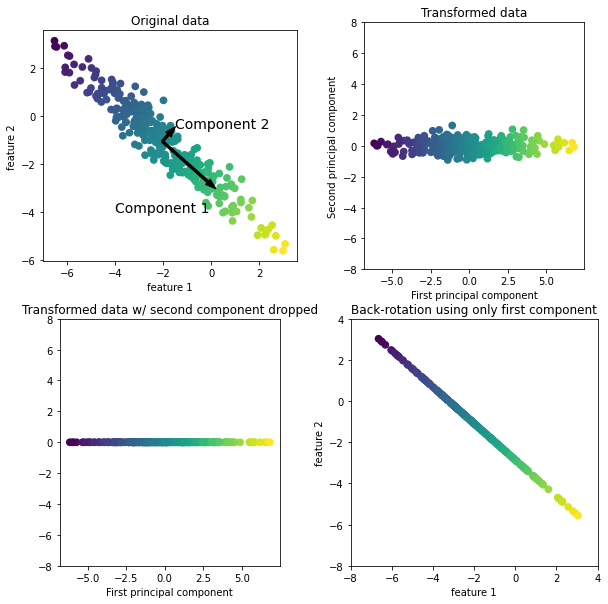

In [13]:
mglearn.plots.plot_pca_illustration()

#Creación del objeto PCA
pca = PCA(n_components=2)
pca.fit(x_normalized)

#Transformación de los datos
transformada = pca.transform(x_normalized)

#Imprimir las dimensiones originales y transformadas
print("Dimensiones originales:", x_normalized.shape)
print("Dimensiones transformadas:", transformada.shape)

__Graficar el conjunto transformado__

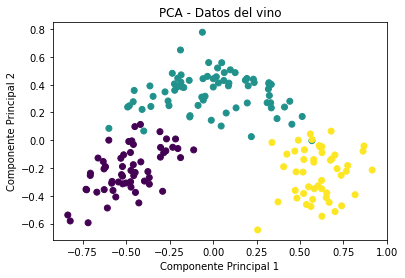

In [14]:
fig, ax = plt.subplots()
ax.scatter(transformada[:, 0], transformada[:, 1], c=y)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
plt.title('PCA - Datos del vino')
plt.show()

## PUNTO 5

In [15]:
k = 3

__K-Means__

El score usando K-Means es: 0.8470966807514034


C:\Users\mbian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Componente pca 2')

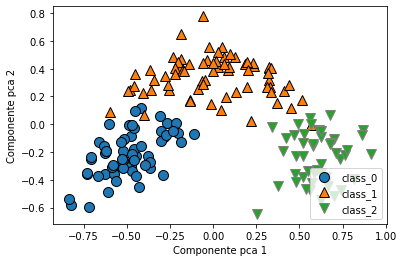

In [16]:
#KMeans en los datos transformados por PCA
k_means = KMeans(n_clusters=k, max_iter=2000) 
k_means.fit(transformada)
y_kmeans = k_means.labels_

predicciones=k_means.predict(transformada)
score=metrics.adjusted_rand_score(datos.target, predicciones)
print('El score usando K-Means es:', score)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1], datos.target)
plt.legend(datos.target_names, loc='lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')

__MiniBatch K-Means__

El score usando MiniBatch KMeans es: 0.8203011716576761


C:\Users\mbian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Text(0, 0.5, 'Componente pca 2')

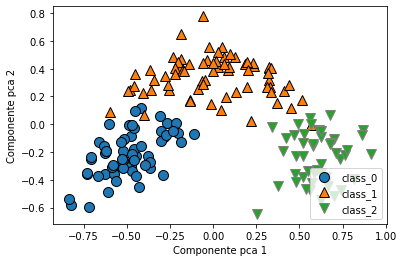

In [17]:
#MiniBatch KMeans en los datos transformados por PCA
kmeans_mini = MiniBatchKMeans(n_clusters=k, max_iter=2000) 
kmeans_mini.fit(transformada)
y_kmeans_mini = kmeans_mini.labels_

predicciones=kmeans_mini.predict(transformada)
score=metrics.adjusted_rand_score(datos.target, predicciones)
print('El score usando MiniBatch KMeans es:', score)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1], datos.target)
plt.legend(datos.target_names, loc='lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')